In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('co2_emissions_data.csv')


if df.size == df.count().sum():  # revise
    print("there are no missing values in the dataset")
else:
    print(f"there are {df.size - df.count().sum()} missing values in the dataset")

there are no missing values in the dataset


In [7]:
numerical_features = df.select_dtypes([float, int])
numerical_input_features = numerical_features.drop(["CO2 Emissions(g/km)"], axis=1) # revise
numerical_features_max = numerical_input_features.max().values
numerical_features_min = numerical_input_features.min().values


is_same_scale = True
for max_val, min_val in zip(numerical_features_max, numerical_features_min):
    for other_max_val, other_min_val in zip(numerical_features_max, numerical_features_min):
        if abs(max_val - other_max_val) > 5 or abs(min_val - other_min_val) > 5:
            is_same_scale = False
            break
    if not is_same_scale:
        break

if is_same_scale:
    print("numeric features have the same scale")
else:
    print("numeric features DON'T have the same scale")

numeric features DON'T have the same scale


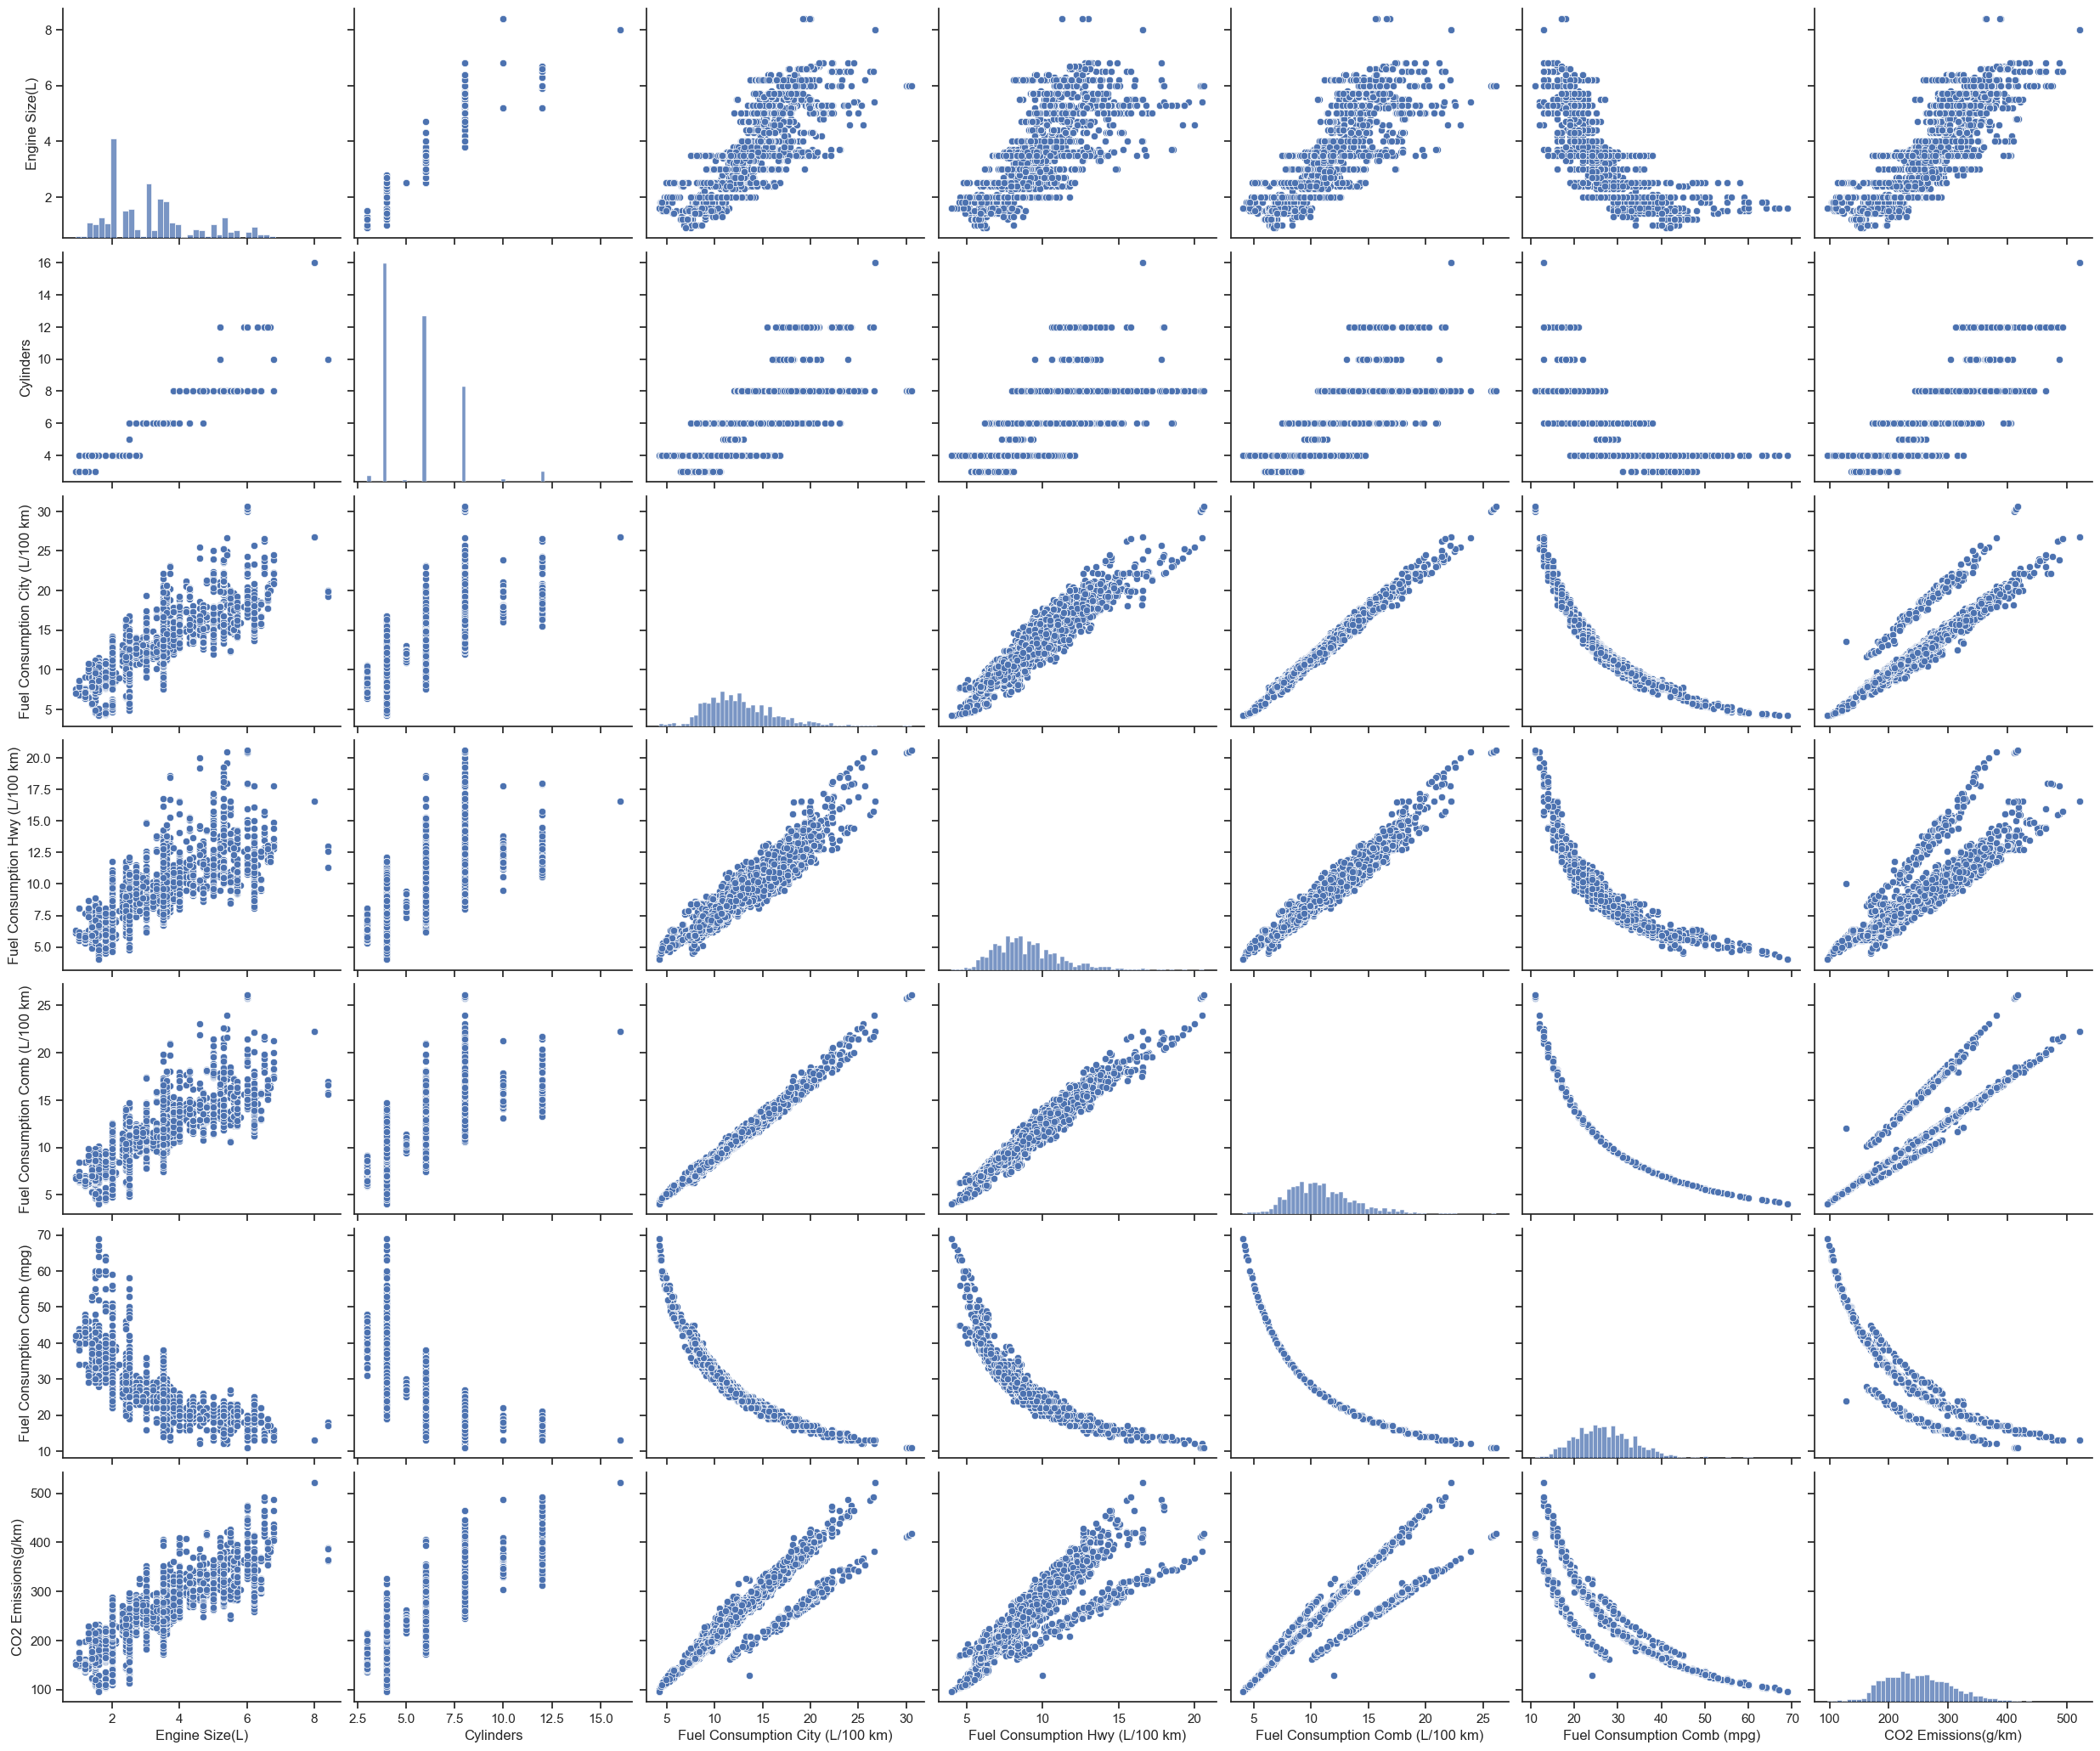

In [8]:
sb.set_theme(style='ticks')
pairplot_diagonal_histograms = sb.pairplot(numerical_features, height=3, aspect=1.2)

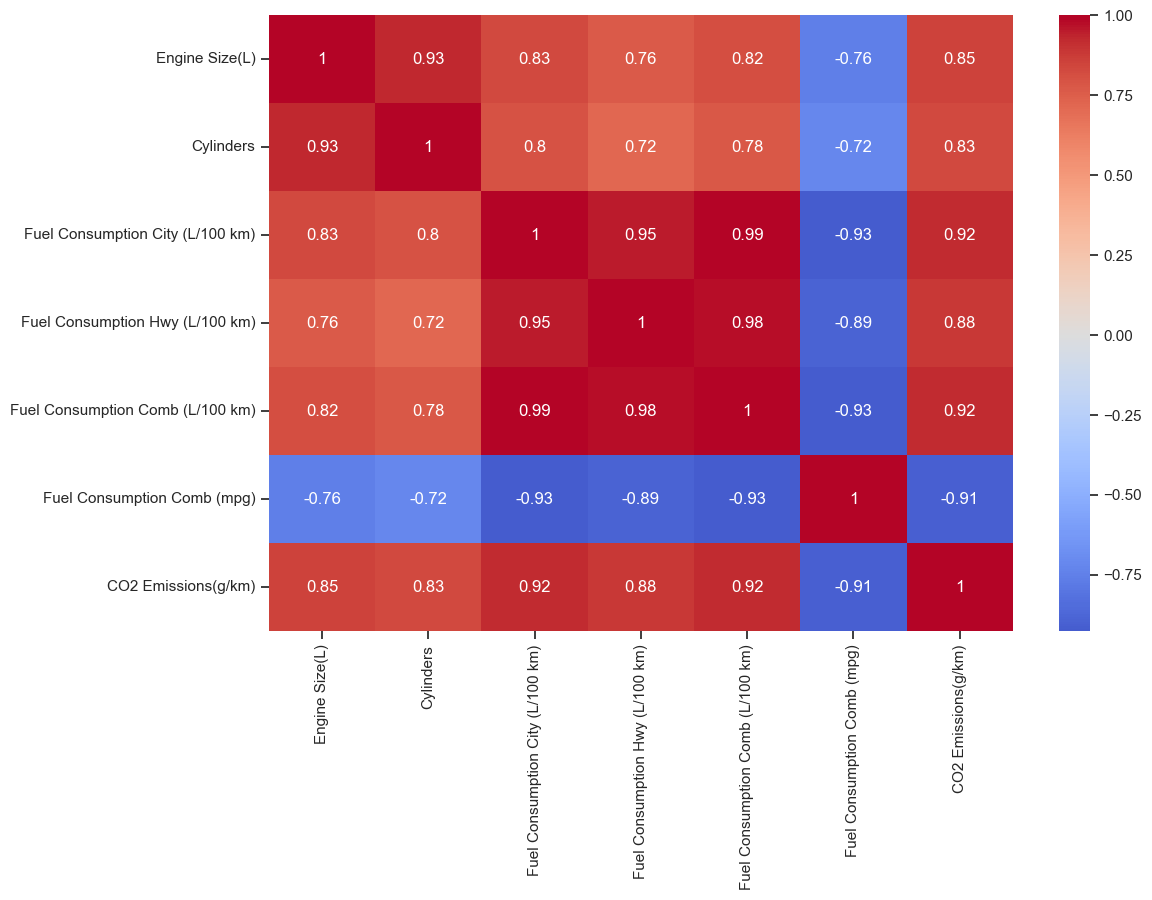

In [9]:
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
correlation_heatmap = sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


In [ ]:
all_input_features = df.drop(columns=["CO2 Emissions(g/km)", "Emission Class"])
# y_regression = df["CO2 Emissions(g/km)"]  # Target for regression
# y_classification = df["Emission Class"]  # Target for classification

In [11]:

# Encode categorical features
categorical_columns = all_input_features.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    all_input_features[col] = label_encoders[col].fit_transform(X[col])

# Encode classification target
y_encoder = LabelEncoder()
y_classification_encoded = y_encoder.fit_transform(y_classification)

NameError: name 'X' is not defined

In [ ]:
import sys
print(sys.executable)